# Project 2: Structure in compressed spaces (Unsupervised learning)


# CE888 Assignment 2

- School of Computer Science and Electronic Engineering - University of Essex

- Submitted By: 1804523

- Reference: Some part of the codes are based on [1], [2], [3].

Description:
Clustering tends to operate nicely if there is clear structure in the data - which however is both hard to define and hard to discover. In this project we will use neural networks to learn good features for clustering by training autoencoders. We will try a novel approach based on a a novel autoencoder structure. We will train an end-to-end autoencoder, with a feature layer that uses softmax neurons, followed by normal reconstruction layers; the goal here is to force the network to learn a representation of the data that forces it to "bin" data intobdifferent groups. We will take the maximum of the feature vector as the potential cluster assignment.

Tasks

- Dataset selection (3 different Dataset).
- Cluster all of them using standard methods and evaluate the performance.
- Train an auto-encoder based on the dataset and use the autoencoder features as inputs to clustering algorithms.
- Train the same auto-encoders, but now change the middle layer to use softmax features.
- Evaluate the method using different cluster sizes and regularisation strengths.

# Implementation 3: Titanic: Machine Learning from Disaster Dataset

- source of data: https://www.kaggle.com/c/titanic/data

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.linear_assignment_ import linear_assignment   

import keras
from keras.models import Model, load_model
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Activation, Flatten, Reshape
    
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import metrics
from keras import regularizers
from keras.utils import plot_model
                                        


Using TensorFlow backend.


In [2]:
# Load the data

df = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

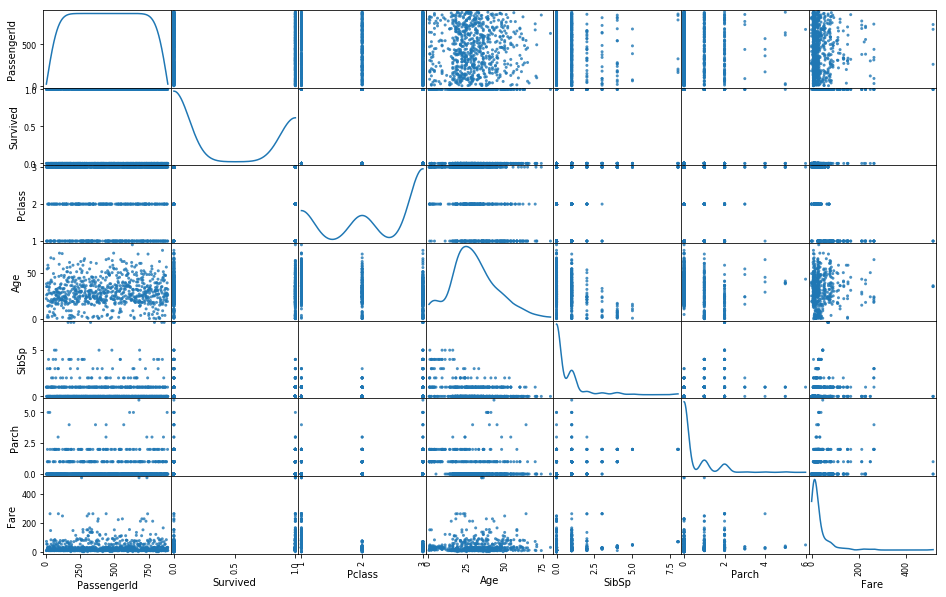

In [3]:
# Produce a scatter matrix for each pair of features in the data
scatter_matrix(df, alpha = 0.8, figsize = (16,10), diagonal = 'kde');

In [4]:
# preview of train dataset

print("================ Train Set =================")
print("\n")
print(df.head(10))
print("\n")
print(df.describe())
print("\n")
print(df.info())
print("\n")
print(df.shape)
print("\n")
print(df.columns.values)


================ Train Set =================


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                

In [5]:
df.keys

<bound method NDFrame.keys of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25    

In [6]:
# preview of test dataset 
print("\n================ Test Set =================")
print("\n")
print(test.head())
print("\n")
print(test.describe())
print("\n")
print(test.info())


================ Test Set =================


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.0

In [7]:
print([key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ])

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [8]:
# check the null value for train data
df.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [9]:
# check the null value for train data
test.isna().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [10]:
# identify the parameter with null value
print("\n================ Train Set =================")
print("\n")
print(df.isna().sum())
print("\n================ Test Set =================")
print("\n")
print(test.isna().sum())


================ Train Set =================


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

================ Test Set =================


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
# fill the missing value (for train dataset)
df.fillna(df.mean(), inplace = True)

In [12]:
test.fillna(test.mean(), inplace = True)

In [13]:
print("\n================ Train Set =================")
print("\n")
print(df.isna().sum())
print("\n================ Test Set =================")
print("\n")
print(test.isna().sum())



================ Train Set =================


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

================ Test Set =================


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [14]:
# check the survived class based on Passenger class
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


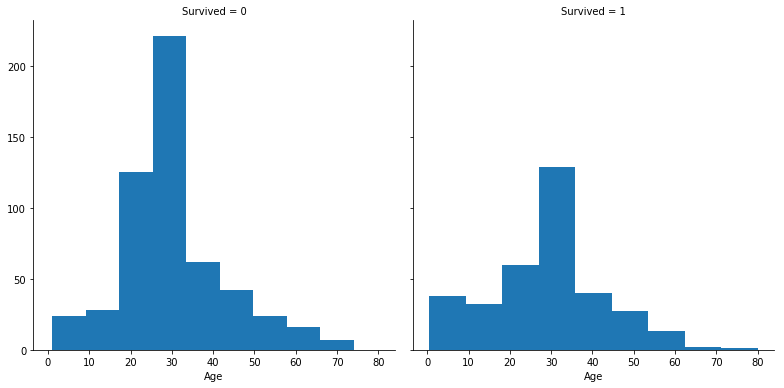

In [16]:
graph = sns.FacetGrid(df, col = 'Survived', height = 5.5, aspect = 1.0)
graph.map(plt.hist, 'Age', bins = 9)

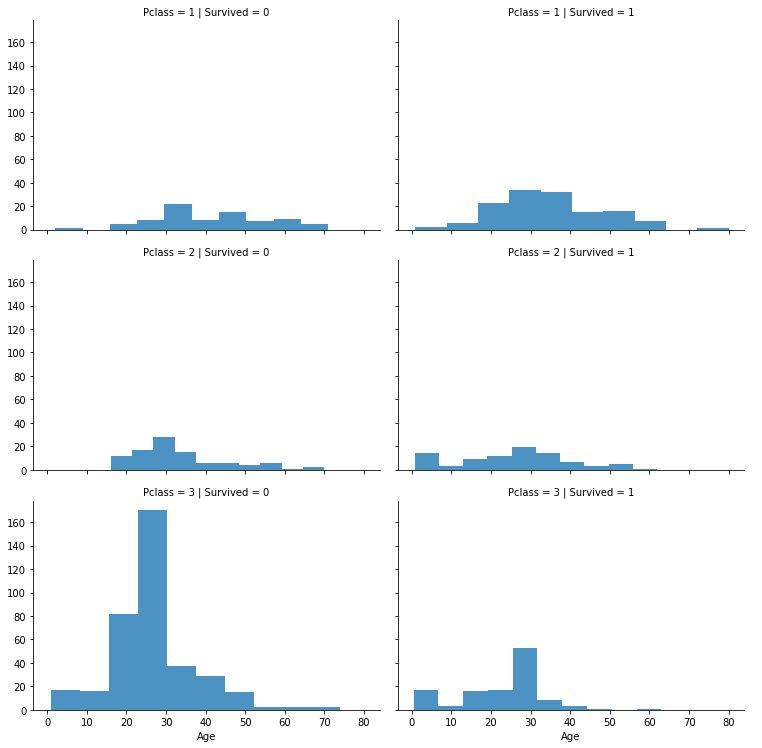

In [17]:
graph = sns.FacetGrid(df, col = 'Survived', row = 'Pclass', height = 3.5, aspect = 1.5)
graph.map(plt.hist, 'Age', alpha = .8, bins = 10)
graph.add_legend()

In [18]:
df = df.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [19]:
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [20]:
sex_label_change = LabelEncoder()
sex_label_change.fit(df['Sex'])
sex_label_change.fit(test['Sex'])
df['Sex'] = sex_label_change.transform(df['Sex'])
test['Sex'] = sex_label_change.transform(test['Sex'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [23]:
test = np.array(test.astype(float))
test

array([[8.92000e+02, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 7.82920e+00],
       [8.93000e+02, 3.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.00000e+00],
       [8.94000e+02, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 9.68750e+00],
       ...,
       [1.30700e+03, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 7.25000e+00],
       [1.30800e+03, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.05000e+00],
       [1.30900e+03, 3.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 2.23583e+01]])

In [24]:
# Drop the labels (survived)

y = np.array(df['Survived'])
df1 = df.drop(labels = ['Survived'], axis = 1)
X_train = np.array(df1.astype(float))
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [26]:
# final data to train the ML Algorithm
X_train

array([[  1.    ,   3.    ,   1.    , ...,   1.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,   0.    , ...,   1.    ,   0.    ,  71.2833],
       [  3.    ,   3.    ,   0.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   3.    ,   0.    , ...,   1.    ,   2.    ,  23.45  ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  30.    ],
       [891.    ,   3.    ,   1.    , ...,   0.    ,   0.    ,   7.75  ]])

# K-Means Algorithm Implementation

In [28]:
# K-Means Algorithm Implementation
# Cluster has been set as 2 as we aready have some idea about the domain.
# parameter tuning

n_clusters = len(np.unique(y))
kmeans = KMeans(n_clusters = n_clusters, max_iter = 600, algorithm = 'auto')

# Train K-Means.
y_prediction_kmeans = kmeans.fit_predict(X_train)

# Testing accuracy for k-means clustering
accuracy_kmeans = np.round(accuracy_score(y, y_prediction_kmeans), 3)
print("Prediction accuracy for k-means : ", accuracy_kmeans)


Prediction accuracy for k-means :  0.508


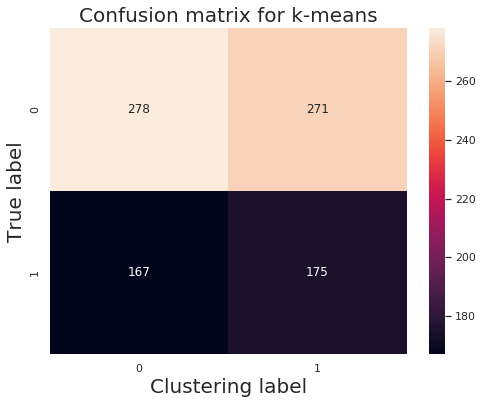

In [29]:
# plotting the confusion matrix
sns.set(font_scale = 1)
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_prediction_kmeans)

plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix, annot = True, fmt = "d", annot_kws = {"size": 12});
plt.title("Confusion matrix for k-means", fontsize = 20)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Clustering label', fontsize = 20)
plt.show()

# Mean Shift Algorithm Implementation

In [30]:
# Mean Shift

# The bandwidth unction automatically derives a bandwidth
bandwidth = estimate_bandwidth(X_train, quantile = 0.2, n_samples = 500)
mean_shift = MeanShift(bandwidth = bandwidth, bin_seeding = True)
y_pred_ms = mean_shift.fit(X_train)
y_prediction_ms = mean_shift.labels_

# Coordinates of the cluster centers.
cluster_centers = mean_shift.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(y_prediction_ms))

print("Number of estimated clusters: {}".format(n_clusters_))

# Testing accuracy for mean shift clustering
accuracy_ms = np.round(accuracy_score(y, y_prediction_ms), 3)
print("Prediction accuracy for mean shift : ", accuracy_ms)


Number of estimated clusters: 7
Prediction accuracy for mean shift :  0.21


# Spectral Clustering Algorithm Implementation

In [31]:
# Spectral Clustering

# fit the model
spectral_clustering = SpectralClustering(n_clusters = n_clusters)
spectral_clustering.fit(X_train)

# predict
y_pred_sc = spectral_clustering.fit_predict(X_train)

# Testing accuracy for Spectral Clustering
accuracy_sc = np.round(accuracy_score(y,y_pred_sc), 3)
print("Prediction accuracy for Spectral Clustering : ", accuracy_sc)


/home/mushfika/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/mushfika/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Prediction accuracy for Spectral Clustering :  0.615


# Affinity propagation clustering Algorithm Implementation

In [32]:
# Affinity propagation clustering 

# fit the model
affinity_propagation = AffinityPropagation().fit(X_train)
# predict
y_pred_ap = affinity_propagation.fit_predict(X_train)

# Testing accuracy for Affinity propagation
accuracy_af = np.round(accuracy_score(y,y_pred_ap), 3)
print("Prediction accuracy for Affinity propagation : ", accuracy_af)

# Pull the number of clusters and assignments of cluster for each data point.
cluster_centers_indices = affinity_propagation.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = affinity_propagation.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

#plt.figure(1)
#plt.clf()
#colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
#for k, col in zip(range(n_clusters_), colors):
#    member_of_class = labels == k
#    cluster_center = X_train[cluster_centers_indices[k]]
#    plt.plot(X_train[member_of_class, 0], X_train[member_of_class, 1], col + '.')
#    plt.plot(cluster_center[0],
#             cluster_center[1],
#             'o',
#             markerfacecolor=col,
#             markeredgecolor='k')
#    for x in X_train[member_of_class]:
        #plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
#plt.title('Estimated number of clusters: {}'.format(n_clusters_))
#plt.show()


Prediction accuracy for Affinity propagation :  0.037
Estimated number of clusters: 19


# Building the autoencoder

- Fully connected with 4 layers of 14, 7, 7, and 29 neurons respectively.
- The first two layers are used for our encoder, the last two go for the decoder
- With L1 Regularization

In [33]:
input_dim = X_train.shape[1]
encoding_dim = 14


input_layer = Input(shape = (input_dim, ))

# encoder
encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation = "relu")(encoder)
#encoder = Dense(int(encoding_dim / 2), activation = "relu")(encoder)

# decoder
decoder = Dense(int(encoding_dim / 2), activation = "tanh")(encoder)
#decoder = Dense(int(encoding_dim / 2), activation = 'relu')(encoder)
decoder = Dense(input_dim, activation ='relu')(decoder)

autoencoder = Model(inputs = input_layer, outputs = decoder)


In [34]:
encoder_epoch = 300
batch_size = 32

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

checkpointer = ModelCheckpoint(filepath = "model.h5", verbose = 0, save_best_only = True)
tensorboard = TensorBoard(log_dir='./autoencoder', histogram_freq = 0, write_graph = True, write_images = True)

history = autoencoder.fit(X_train, X_train,
                    epochs = encoder_epoch,
                    batch_size = batch_size,
                    shuffle = True,
                    validation_data = (test, test),
                    verbose = 1,
                    callbacks = [checkpointer, tensorboard]).history


Train on 891 samples, validate on 418 samples
Epoch 1/300
891/891 [==============================] - 0s 274us/step - loss: 38271.0149 - acc: 0.9585 - val_loss: 175120.2089 - val_acc: 1.0000
Epoch 2/300
891/891 [==============================] - 0s 60us/step - loss: 38174.6782 - acc: 0.9574 - val_loss: 174919.6733 - val_acc: 1.0000
Epoch 3/300
891/891 [==============================] - 0s 57us/step - loss: 38106.1352 - acc: 0.9562 - val_loss: 174779.9970 - val_acc: 1.0000
Epoch 4/300
891/891 [==============================] - 0s 62us/step - loss: 38056.1953 - acc: 0.9562 - val_loss: 174669.9714 - val_acc: 1.0000
Epoch 5/300
891/891 [==============================] - 0s 60us/step - loss: 38015.7477 - acc: 0.9562 - val_loss: 174579.1631 - val_acc: 1.0000
Epoch 6/300
891/891 [==============================] - 0s 56us/step - loss: 37980.1761 - acc: 0.9562 - val_loss: 174496.5607 - val_acc: 1.0000
Epoch 7/300
891/891 [==============================] - 0s 68us/step - loss: 37947.3886 - acc: 0

891/891 [==============================] - 0s 77us/step - loss: 36453.8355 - acc: 0.9562 - val_loss: 170803.0970 - val_acc: 1.0000
Epoch 58/300
891/891 [==============================] - 0s 62us/step - loss: 36425.3266 - acc: 0.9562 - val_loss: 170733.6005 - val_acc: 1.0000
Epoch 59/300
891/891 [==============================] - 0s 57us/step - loss: 36397.0296 - acc: 0.9562 - val_loss: 170663.3965 - val_acc: 1.0000
Epoch 60/300
891/891 [==============================] - 0s 58us/step - loss: 36368.6137 - acc: 0.9562 - val_loss: 170593.8735 - val_acc: 1.0000
Epoch 61/300
891/891 [==============================] - 0s 58us/step - loss: 36340.4020 - acc: 0.9562 - val_loss: 170523.9592 - val_acc: 1.0000
Epoch 62/300
891/891 [==============================] - 0s 60us/step - loss: 36312.2104 - acc: 0.9562 - val_loss: 170453.7981 - val_acc: 1.0000
Epoch 63/300
891/891 [==============================] - 0s 57us/step - loss: 36283.8967 - acc: 0.9562 - val_loss: 170384.4818 - val_acc: 1.0000
Epoch

Epoch 114/300
891/891 [==============================] - 0s 64us/step - loss: 34789.4165 - acc: 0.9562 - val_loss: 166780.6392 - val_acc: 1.0000
Epoch 115/300
891/891 [==============================] - 0s 57us/step - loss: 34761.9909 - acc: 0.9562 - val_loss: 166712.5948 - val_acc: 1.0000
Epoch 116/300
891/891 [==============================] - 0s 60us/step - loss: 34734.8804 - acc: 0.9562 - val_loss: 166642.9102 - val_acc: 1.0000
Epoch 117/300
891/891 [==============================] - 0s 56us/step - loss: 34707.3988 - acc: 0.9562 - val_loss: 166574.8920 - val_acc: 1.0000
Epoch 118/300
891/891 [==============================] - 0s 61us/step - loss: 34680.1452 - acc: 0.9562 - val_loss: 166506.9602 - val_acc: 1.0000
Epoch 119/300
891/891 [==============================] - 0s 56us/step - loss: 34653.1015 - acc: 0.9562 - val_loss: 166438.0216 - val_acc: 1.0000
Epoch 120/300
891/891 [==============================] - 0s 64us/step - loss: 34625.7832 - acc: 0.9562 - val_loss: 166369.9575 - v

891/891 [==============================] - 0s 70us/step - loss: 33308.3853 - acc: 0.9562 - val_loss: 163000.1464 - val_acc: 1.0000
Epoch 171/300
891/891 [==============================] - 0s 68us/step - loss: 33282.7383 - acc: 0.9562 - val_loss: 162933.9548 - val_acc: 1.0000
Epoch 172/300
891/891 [==============================] - 0s 58us/step - loss: 33257.2308 - acc: 0.9562 - val_loss: 162866.8118 - val_acc: 1.0000
Epoch 173/300
891/891 [==============================] - 0s 62us/step - loss: 33231.5413 - acc: 0.9562 - val_loss: 162800.2699 - val_acc: 1.0000
Epoch 174/300
891/891 [==============================] - 0s 55us/step - loss: 33206.0424 - acc: 0.9562 - val_loss: 162733.1449 - val_acc: 1.0000
Epoch 175/300
891/891 [==============================] - 0s 56us/step - loss: 33180.3198 - acc: 0.9562 - val_loss: 162667.3660 - val_acc: 1.0000
Epoch 176/300
891/891 [==============================] - 0s 54us/step - loss: 33155.0040 - acc: 0.9562 - val_loss: 162600.5984 - val_acc: 1.0000

891/891 [==============================] - 0s 61us/step - loss: 31899.4889 - acc: 0.9562 - val_loss: 159302.3103 - val_acc: 1.0000
Epoch 227/300
891/891 [==============================] - 0s 55us/step - loss: 31874.9562 - acc: 0.9562 - val_loss: 159236.0055 - val_acc: 1.0000
Epoch 228/300
891/891 [==============================] - 0s 70us/step - loss: 31850.0669 - acc: 0.9562 - val_loss: 159171.3962 - val_acc: 1.0000
Epoch 229/300
891/891 [==============================] - 0s 59us/step - loss: 31825.3026 - acc: 0.9562 - val_loss: 159105.8270 - val_acc: 1.0000
Epoch 230/300
891/891 [==============================] - 0s 58us/step - loss: 31800.5904 - acc: 0.9562 - val_loss: 159039.6862 - val_acc: 1.0000
Epoch 231/300
891/891 [==============================] - 0s 59us/step - loss: 31775.7885 - acc: 0.9562 - val_loss: 158974.5863 - val_acc: 1.0000
Epoch 232/300
891/891 [==============================] - 0s 56us/step - loss: 31751.2416 - acc: 0.9562 - val_loss: 158908.6776 - val_acc: 1.0000

891/891 [==============================] - 0s 59us/step - loss: 30537.4368 - acc: 0.9562 - val_loss: 155657.1420 - val_acc: 1.0000
Epoch 283/300
891/891 [==============================] - 0s 77us/step - loss: 30513.5040 - acc: 0.9562 - val_loss: 155593.2337 - val_acc: 1.0000
Epoch 284/300
891/891 [==============================] - 0s 66us/step - loss: 30489.7781 - acc: 0.9562 - val_loss: 155528.0544 - val_acc: 1.0000
Epoch 285/300
891/891 [==============================] - 0s 59us/step - loss: 30465.7980 - acc: 0.9562 - val_loss: 155463.6510 - val_acc: 1.0000
Epoch 286/300
891/891 [==============================] - 0s 58us/step - loss: 30442.0310 - acc: 0.9562 - val_loss: 155398.5391 - val_acc: 1.0000
Epoch 287/300
891/891 [==============================] - 0s 56us/step - loss: 30418.0329 - acc: 0.9562 - val_loss: 155334.6099 - val_acc: 1.0000
Epoch 288/300
891/891 [==============================] - 0s 56us/step - loss: 30394.4370 - acc: 0.9562 - val_loss: 155268.7150 - val_acc: 1.0000

In [35]:
autoencoder = load_model('model.h5')

In [39]:
kmeans = KMeans(n_clusters = n_clusters, max_iter = 600, algorithm = 'auto')

# Train K-Means with autoencoder features
y_prediction_kmeans_ae = kmeans.fit_predict(autoencoder.predict(X_train))

# Testing accuracy for k-means clustering
accuracy_kmeans = np.round(accuracy_score(y, y_prediction_kmeans_ae), 3)
print("Prediction accuracy for k-means (with auto encoder) : ", accuracy_kmeans)


Prediction accuracy for k-means (with auto encoder) :  0.612


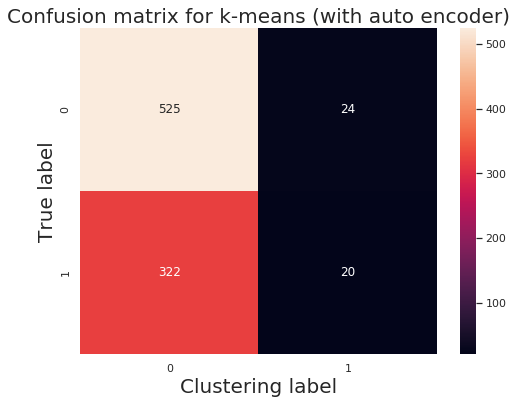

In [40]:
# plotting the confusion matrix
sns.set(font_scale = 1)
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_prediction_kmeans_ae)

plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix, annot = True, fmt = "d", annot_kws = {"size": 12});
plt.title("Confusion matrix for k-means (with auto encoder)", fontsize = 20)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Clustering label', fontsize = 20)
plt.show()

In [41]:
# Train the Spectral Clustering with autoencoder features


# predict
y_pred_sc_ae = spectral_clustering.fit_predict(autoencoder.predict(X_train))

# Testing accuracy for Spectral Clustering
accuracy_sc_ae = np.round(accuracy_score(y,y_pred_sc_ae), 3)
print("Prediction accuracy for Spectral Clustering with autoencoder: ", accuracy_sc_ae)

Prediction accuracy for Spectral Clustering with autoencoder:  0.603


# Autoencoder with softmax activation layer

In [42]:
input_dim = X_train.shape[1]
encoding_dim = 14


input_layer = Input(shape = (input_dim, ))

# encoder with softmax as middle activation layer
encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation = "softmax")(encoder)
encoder = Dense(int(encoding_dim / 2), activation = "relu")(encoder)

# decoder with softmax as middle activation layer
decoder = Dense(int(encoding_dim / 2), activation = "tanh")(encoder)
decoder = Dense(int(encoding_dim / 2), activation = 'softmax')(encoder)            
decoder = Dense(input_dim, activation ='relu')(decoder)

autoencoder_softmax_middle = Model(inputs = input_layer, outputs = decoder)

In [43]:
encoder_epoch = 300
batch_size = 32

autoencoder_softmax_middle.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

checkpointer = ModelCheckpoint(filepath = "model1.h5", verbose = 0, save_best_only = True)
tensorboard = TensorBoard(log_dir='./autoencoder', histogram_freq = 0, write_graph = True, write_images = True)

history = autoencoder_softmax_middle.fit(X_train, X_train,
                    epochs = encoder_epoch,
                    batch_size = batch_size,
                    shuffle = True,
                    validation_data = (test, test),
                    verbose = 1,
                    callbacks = [checkpointer, tensorboard]).history


Train on 891 samples, validate on 418 samples
Epoch 1/300
891/891 [==============================] - 0s 348us/step - loss: 38518.0486 - acc: 0.0202 - val_loss: 175872.9964 - val_acc: 0.0000e+00
Epoch 2/300
891/891 [==============================] - 0s 65us/step - loss: 38517.3496 - acc: 0.0202 - val_loss: 175872.1934 - val_acc: 0.0000e+00
Epoch 3/300
891/891 [==============================] - 0s 92us/step - loss: 38516.6097 - acc: 0.0202 - val_loss: 175871.3375 - val_acc: 0.0000e+00
Epoch 4/300
891/891 [==============================] - 0s 79us/step - loss: 38515.8215 - acc: 0.0202 - val_loss: 175870.4147 - val_acc: 0.0000e+00
Epoch 5/300
891/891 [==============================] - 0s 81us/step - loss: 38514.9427 - acc: 0.0202 - val_loss: 175869.3629 - val_acc: 0.0000e+00
Epoch 6/300
891/891 [==============================] - 0s 78us/step - loss: 38513.9639 - acc: 0.0202 - val_loss: 175868.3052 - val_acc: 0.0000e+00
Epoch 7/300
891/891 [==============================] - 0s 81us/step - l

891/891 [==============================] - 0s 87us/step - loss: 38454.6474 - acc: 0.0236 - val_loss: 175805.3975 - val_acc: 0.0000e+00
Epoch 57/300
891/891 [==============================] - 0s 83us/step - loss: 38453.8154 - acc: 0.0236 - val_loss: 175804.4827 - val_acc: 0.0000e+00
Epoch 58/300
891/891 [==============================] - 0s 84us/step - loss: 38452.9772 - acc: 0.0236 - val_loss: 175803.5929 - val_acc: 0.0000e+00
Epoch 59/300
891/891 [==============================] - 0s 82us/step - loss: 38452.1436 - acc: 0.0236 - val_loss: 175802.7115 - val_acc: 0.0000e+00
Epoch 60/300
891/891 [==============================] - 0s 84us/step - loss: 38451.3182 - acc: 0.0236 - val_loss: 175801.8236 - val_acc: 0.0000e+00
Epoch 61/300
891/891 [==============================] - 0s 84us/step - loss: 38450.4934 - acc: 0.0236 - val_loss: 175800.9357 - val_acc: 0.0000e+00
Epoch 62/300
891/891 [==============================] - 0s 82us/step - loss: 38449.6750 - acc: 0.0236 - val_loss: 175800.0490

891/891 [==============================] - 0s 83us/step - loss: 38412.3827 - acc: 0.0236 - val_loss: 175759.9392 - val_acc: 0.0000e+00
Epoch 112/300
891/891 [==============================] - 0s 83us/step - loss: 38411.6749 - acc: 0.0236 - val_loss: 175759.1709 - val_acc: 0.0000e+00
Epoch 113/300
891/891 [==============================] - 0s 92us/step - loss: 38410.9719 - acc: 0.0236 - val_loss: 175758.4054 - val_acc: 0.0000e+00
Epoch 114/300
891/891 [==============================] - 0s 80us/step - loss: 38410.2624 - acc: 0.0236 - val_loss: 175757.6388 - val_acc: 0.0000e+00
Epoch 115/300
891/891 [==============================] - 0s 89us/step - loss: 38409.5613 - acc: 0.0236 - val_loss: 175756.8825 - val_acc: 0.0000e+00
Epoch 116/300
891/891 [==============================] - 0s 90us/step - loss: 38408.8604 - acc: 0.0236 - val_loss: 175756.1195 - val_acc: 0.0000e+00
Epoch 117/300
891/891 [==============================] - 0s 119us/step - loss: 38408.1647 - acc: 0.0236 - val_loss: 1757

Epoch 166/300
891/891 [==============================] - 0s 68us/step - loss: 38376.1459 - acc: 0.0236 - val_loss: 175720.5847 - val_acc: 0.0000e+00
Epoch 167/300
891/891 [==============================] - 0s 97us/step - loss: 38375.5337 - acc: 0.0236 - val_loss: 175719.9238 - val_acc: 0.0000e+00
Epoch 168/300
891/891 [==============================] - 0s 115us/step - loss: 38374.9223 - acc: 0.0236 - val_loss: 175719.2772 - val_acc: 0.0000e+00
Epoch 169/300
891/891 [==============================] - 0s 100us/step - loss: 38374.3197 - acc: 0.0236 - val_loss: 175718.6140 - val_acc: 0.0000e+00
Epoch 170/300
891/891 [==============================] - 0s 91us/step - loss: 38373.7188 - acc: 0.0236 - val_loss: 175717.9411 - val_acc: 0.0000e+00
Epoch 171/300
891/891 [==============================] - 0s 84us/step - loss: 38373.1111 - acc: 0.0236 - val_loss: 175717.2899 - val_acc: 0.0000e+00
Epoch 172/300
891/891 [==============================] - 0s 88us/step - loss: 38372.5120 - acc: 0.0236 -

Epoch 221/300
891/891 [==============================] - 0s 88us/step - loss: 38345.0635 - acc: 0.0236 - val_loss: 175686.5043 - val_acc: 0.0000e+00
Epoch 222/300
891/891 [==============================] - 0s 122us/step - loss: 38344.5460 - acc: 0.0236 - val_loss: 175685.9294 - val_acc: 0.0000e+00
Epoch 223/300
891/891 [==============================] - 0s 79us/step - loss: 38344.0241 - acc: 0.0236 - val_loss: 175685.3611 - val_acc: 0.0000e+00
Epoch 224/300
891/891 [==============================] - 0s 118us/step - loss: 38343.5082 - acc: 0.0236 - val_loss: 175684.7950 - val_acc: 0.0000e+00
Epoch 225/300
891/891 [==============================] - 0s 132us/step - loss: 38342.9924 - acc: 0.0236 - val_loss: 175684.2225 - val_acc: 0.0000e+00
Epoch 226/300
891/891 [==============================] - 0s 73us/step - loss: 38342.4825 - acc: 0.0236 - val_loss: 175683.6510 - val_acc: 0.0000e+00
Epoch 227/300
891/891 [==============================] - 0s 86us/step - loss: 38341.9719 - acc: 0.0236 

Epoch 276/300
891/891 [==============================] - 0s 91us/step - loss: 38318.8220 - acc: 0.0236 - val_loss: 175657.3224 - val_acc: 0.0000e+00
Epoch 277/300
891/891 [==============================] - 0s 87us/step - loss: 38318.3903 - acc: 0.0236 - val_loss: 175656.8417 - val_acc: 0.0000e+00
Epoch 278/300
891/891 [==============================] - 0s 81us/step - loss: 38317.9634 - acc: 0.0236 - val_loss: 175656.3508 - val_acc: 0.0000e+00
Epoch 279/300
891/891 [==============================] - 0s 94us/step - loss: 38317.5299 - acc: 0.0236 - val_loss: 175655.8744 - val_acc: 0.0000e+00
Epoch 280/300
891/891 [==============================] - 0s 69us/step - loss: 38317.1002 - acc: 0.0236 - val_loss: 175655.3954 - val_acc: 0.0000e+00
Epoch 281/300
891/891 [==============================] - 0s 78us/step - loss: 38316.6787 - acc: 0.0236 - val_loss: 175654.9148 - val_acc: 0.0000e+00
Epoch 282/300
891/891 [==============================] - 0s 99us/step - loss: 38316.2484 - acc: 0.0236 - v

In [44]:
autoencoder_softmax_middle = load_model('model1.h5')

In [46]:
kmeans = KMeans(n_clusters = n_clusters, max_iter = 600, algorithm = 'auto')

# Train K-Means with autoencoder features
y_prediction_kmeans_ae_softmax = kmeans.fit_predict(autoencoder_softmax_middle.predict(X_train))

# Testing accuracy for k-means clustering
accuracy_kmeans_ae_sft = np.round(accuracy_score(y, y_prediction_kmeans_ae_softmax), 3)
print("Prediction accuracy for k-means (with auto encoder and softmax act layer) : ", accuracy_kmeans_ae_sft)

Prediction accuracy for k-means (with auto encoder and softmax act layer) :  0.615


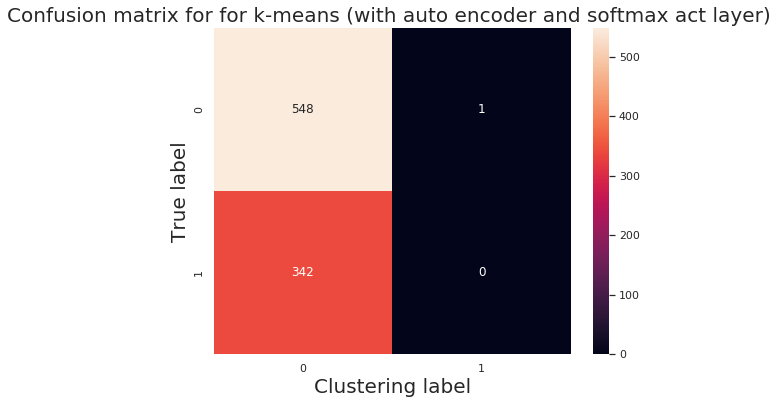

In [47]:
# plotting the confusion matrix
sns.set(font_scale = 1)
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_prediction_kmeans_ae_softmax )

plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix, annot = True, fmt = "d", annot_kws = {"size": 12});
plt.title("Confusion matrix for for k-means (with auto encoder and softmax act layer) ", fontsize = 20)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Clustering label', fontsize = 20)
plt.show()

References
- [1] F. Chollet, "Building Autoencoders in Keras", Keras Blog, 2016. online: https://blog.keras.io/building-autoencoders-in-keras.html
- [2] "2.3. Clustering", scikit-learn. online: https://scikit-learn.org/stable/modules/clustering.html#clustering
- [3] "Autoencoders", UFLDL Tutorial|Stanford.edu. online: http://ufldl.stanford.edu/tutorial/